In [4]:
import requests
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Search for a song
song_title = "Imagine"
artist_name = "John Lennon"
search_url = f"https://itunes.apple.com/search?term={song_title}+{artist_name}&media=music&entity=song&limit=1"

response = requests.get(search_url)
results = response.json()

# Get the first result
song = results['results'][0]

# Print information about the song
print(f"Track name: {song['trackName']}")
print(f"Artist: {song['artistName']}")

# Download the audio preview
preview_url = song['previewUrl']
response = requests.get(preview_url)
with open('preview.m4a', 'wb') as audio_file:
    audio_file.write(response.content)

# Load the audio file with librosa
audio_data, sample_rate = librosa.load('preview.m4a')

# Compute the short-time Fourier transform (STFT) to generate the spectrogram
spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)

# # Display the spectrogram using matplotlib
# plt.figure(figsize=(12, 6))
# librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
# plt.title(f'Spectrogram for {song_title} by {artist_name}')
# plt.show()


Track name: Imagine (John Lennon)
Artist: Ravi


/var/folders/gd/pxcx2w0x59j2bsjbzhy62nvw0000gn/T/ipykernel_24446/2819383942.py:29: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load('preview.m4a')
/var/folders/gd/pxcx2w0x59j2bsjbzhy62nvw0000gn/T/ipykernel_24446/2819383942.py:32: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)


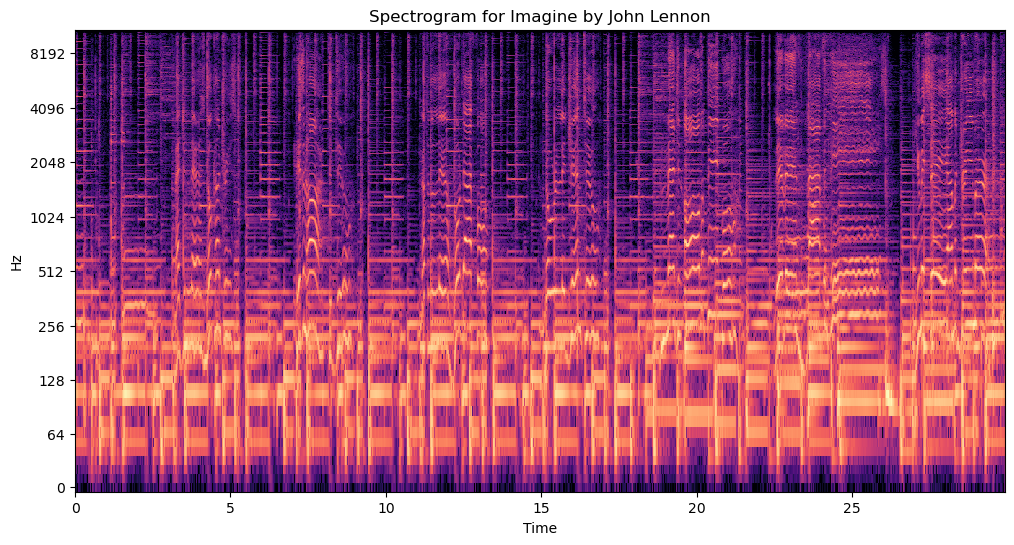

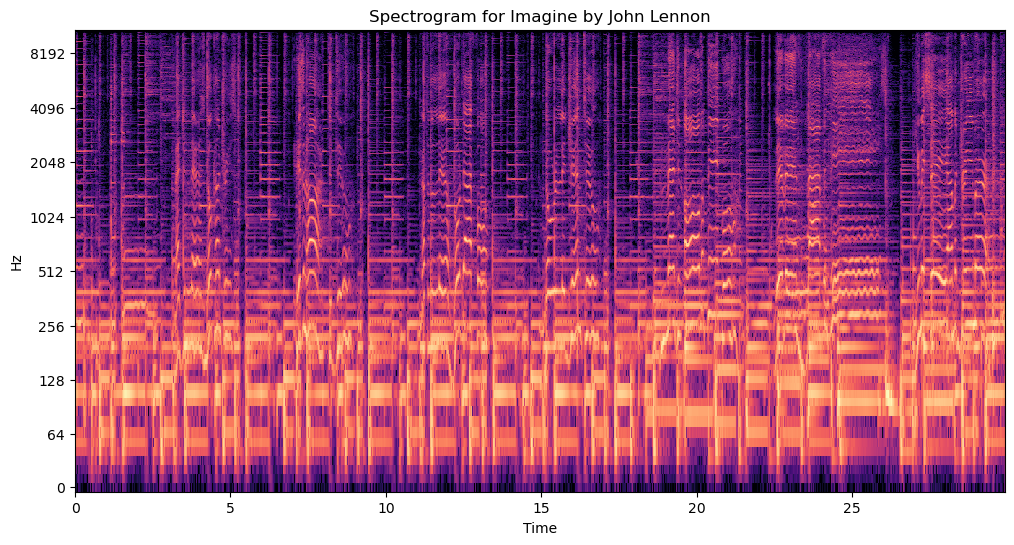

<Figure size 1200x600 with 0 Axes>

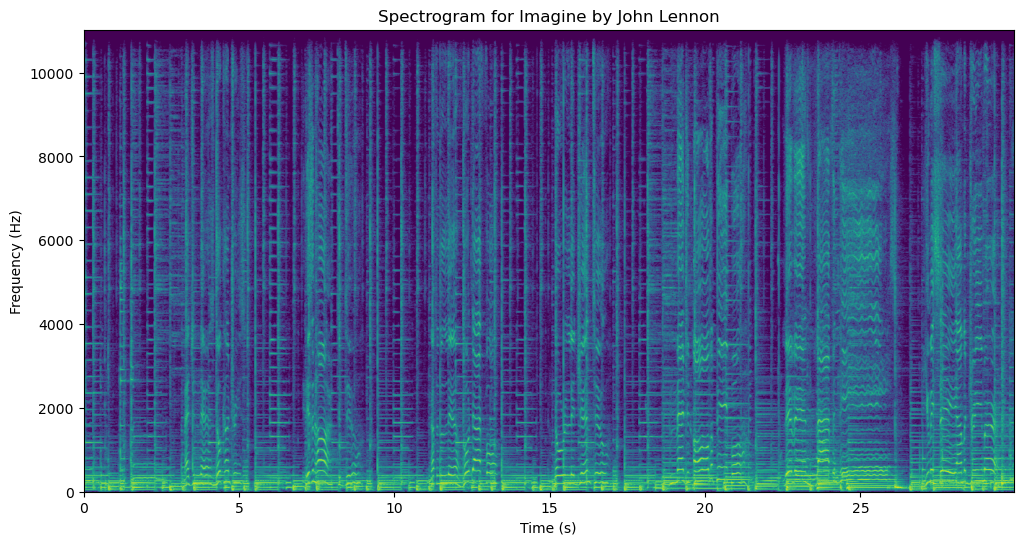

AttributeError: module 'matplotlib' has no attribute 'pyplot'

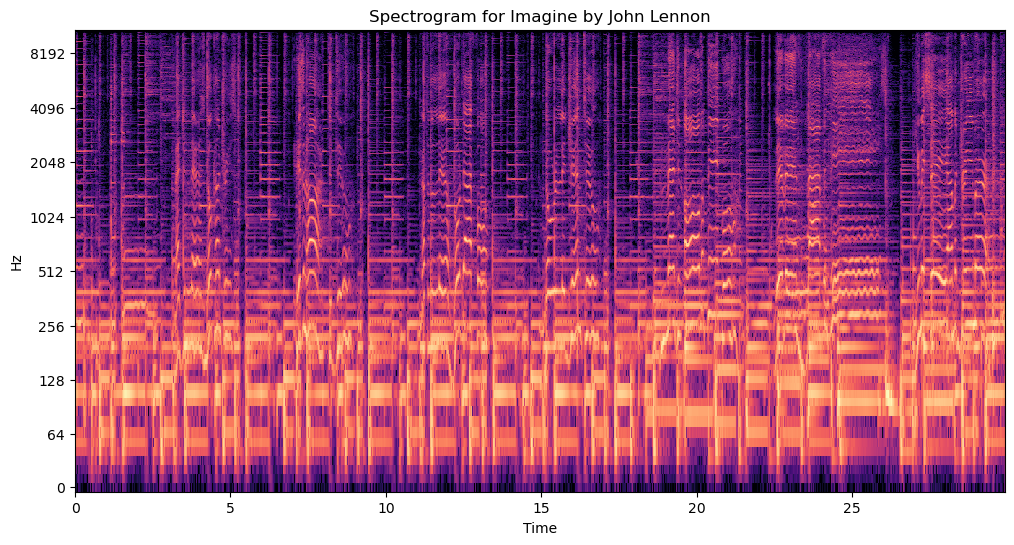

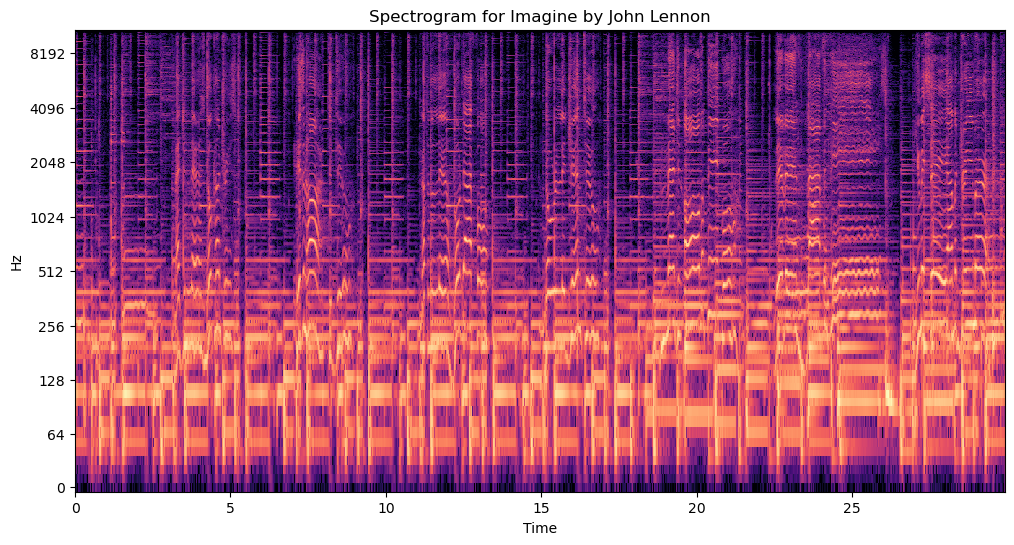

<Figure size 1200x600 with 0 Axes>

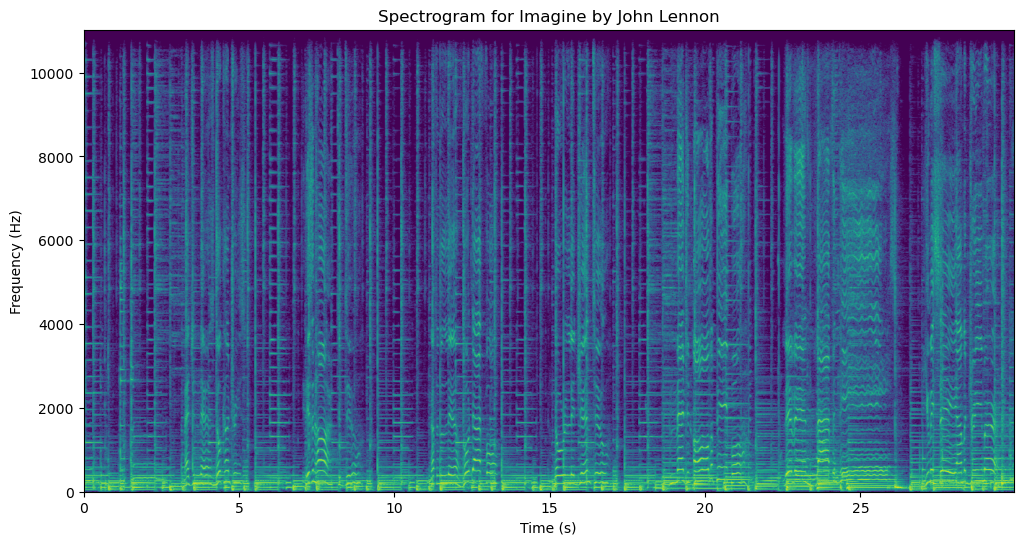

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [6]:
# Display the spectrogram using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis', extent=[0, len(audio_data) / sample_rate, 0, sample_rate // 2])

# Set the axis labels and formatting
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Set the title
plt.title(f'Spectrogram for {song_title} by {artist_name}')

# Display the plot
plt.show()